In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
# 1.) Loading the dataset.
try:
    data = pd.read_csv('/content/Mall_Customers.csv')
except FileNotFoundError:
    print("Error: Mall_Customers.csv not found. Please check your file path.")

# 2.) Selecting the key features for clustering.
X = data.iloc[:, [3, 4]].values

print("\nSelected features (Income and Spending Score):")
print(X[:5])


Selected features (Income and Spending Score):
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


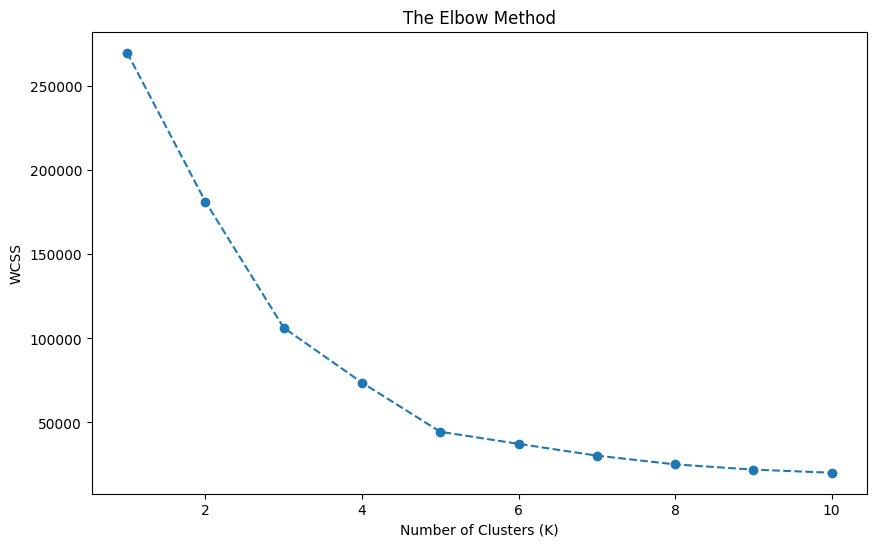

In [14]:
wcss = []
# 3.) Testing K values from 1 up to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# 4.) Plotting the Elbow Method graph.
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [15]:
optimal_k = 5

# 5.) Training the K-Means model with the optimal number of clusters.
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# 6.) Fitting the model and predict the cluster for each customer.
y_kmeans = kmeans.fit_predict(X)

print(f"\nFirst 10 cluster labels (0 to {optimal_k-1}): {y_kmeans[:10]}")

centroids = kmeans.cluster_centers_
print("\nCluster Centroids (Income, Spending Score):")
print(centroids)


First 10 cluster labels (0 to 4): [4 2 4 2 4 2 4 2 4 2]

Cluster Centroids (Income, Spending Score):
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


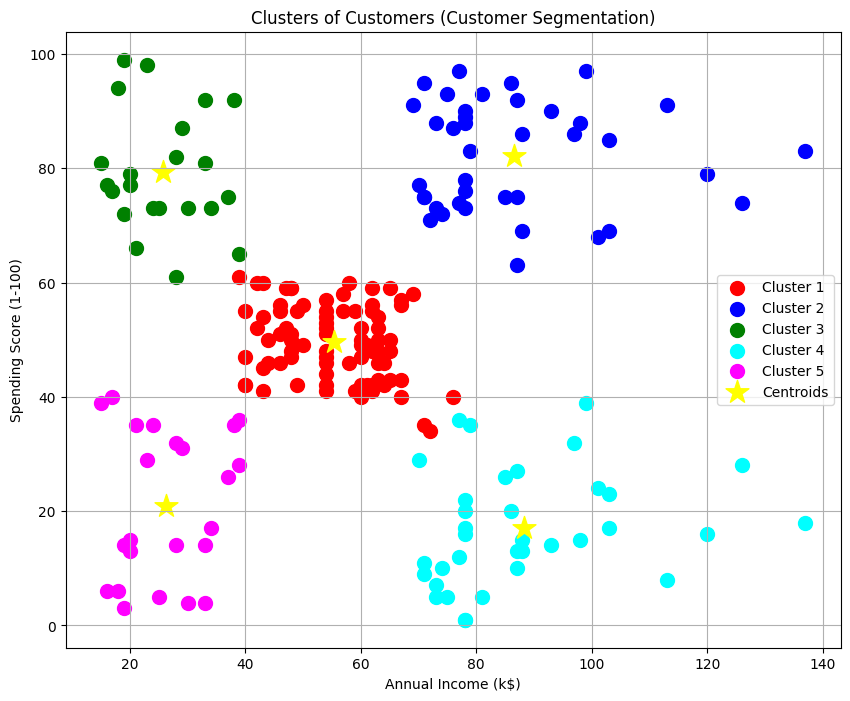

In [16]:
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(optimal_k):
    plt.scatter(
        X[y_kmeans == i, 0],
        X[y_kmeans == i, 1],
        s=100,
        c=colors[i],
        label=f'Cluster {i+1}'
    )

# 7.) Plotting the centroids.
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='yellow',
    marker='*',
    label='Centroids'
)

plt.title('Clusters of Customers (Customer Segmentation)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()